In [1]:
#importing libraries that will be necessary throughout the whole project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [ ]:
#loading the dataset
data = pd.read_csv("Car_Insurance_Claim.csv", sep=";")
data.head()


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
#let's start the exploratory data analysis:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In the next cells we'll be analyzing our dataset, identifying the unique values for certain variables, converting categorical variables to numerical ones, leveraging the map function. Sometimes, column values are not encoded perfectly so we'll also have to convert categorical values to string type first.

In [5]:
data.columns
data["AGE"].unique()

array(['65+', '16-25', '26-39', '40-64'], dtype=object)

In [6]:
data["AGE"] = data["AGE"].astype("str")

In [7]:
data["AGE"].isna().sum()

np.int64(0)

In [8]:
#changing values of the column age:
def categorize_age(age_range):
    if age_range == "65+":
        return 65
    elif age_range == "16-25":
        return (16 + 25) / 2
    elif age_range == "26-39":
        return (26 + 39) / 2
    elif age_range == "40-64":
        return (40 + 64) / 2
    else:
        return np.nan

data["AGE"] = data["AGE"].apply(categorize_age)   
data.head()
    



,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65.0,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,20.5,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,20.5,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,20.5,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,32.5,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [9]:
data["AGE"].isna().sum()

np.int64(0)

In [10]:
#variable driving experience:
data["DRIVING_EXPERIENCE"].unique()
data["DRIVING_EXPERIENCE"] = data["DRIVING_EXPERIENCE"].astype("str")

In [11]:
data["DRIVING_EXPERIENCE"].unique()

array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

In [12]:
def categorize_experience(exp_range):
    if exp_range == "0-9y":
        return (0 + 9) / 2
    elif exp_range == "10-19y":
        return (10 + 19) / 2
    elif exp_range == "20-29y":
        return (20 + 29) / 2
    elif exp_range == "30y+":
        return 30
    else:
        return np.nan

data["DRIVING_EXPERIENCE"] = data["DRIVING_EXPERIENCE"].apply(categorize_experience) 
data.head()  

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65.0,female,majority,4.5,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,20.5,male,majority,4.5,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,20.5,female,majority,4.5,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,20.5,male,majority,4.5,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,32.5,male,majority,14.5,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [13]:
#let's delete columns that do not tell us anything meaningful
data.drop("ID", axis=1, inplace=True)

In [14]:
#lists of unique values for each column:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column:{column}, Unique values: {unique_values}")

Column:AGE, Unique values: [65.  20.5 32.5 52. ]
Column:GENDER, Unique values: ['female' 'male']
Column:RACE, Unique values: ['majority' 'minority']
Column:DRIVING_EXPERIENCE, Unique values: [ 4.5 14.5 24.5 30. ]
Column:EDUCATION, Unique values: ['high school' 'none' 'university']
Column:INCOME, Unique values: ['upper class' 'poverty' 'working class' 'middle class']
Column:CREDIT_SCORE, Unique values: [0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]
Column:VEHICLE_OWNERSHIP, Unique values: [1. 0.]
Column:VEHICLE_YEAR, Unique values: ['after 2015' 'before 2015']
Column:MARRIED, Unique values: [0. 1.]
Column:CHILDREN, Unique values: [1. 0.]
Column:POSTAL_CODE, Unique values: [10238 32765 92101 21217]
Column:ANNUAL_MILEAGE, Unique values: [12000. 16000. 11000. 13000. 14000. 10000.  8000.    nan 18000. 17000.
  7000. 15000.  9000.  5000.  6000. 19000.  4000.  3000.  2000. 20000.
 21000. 22000.]
Column:VEHICLE_TYPE, Unique values: ['sedan' 'sports car']
Column:SPEEDIN

In [15]:
#let's see the range of our variable credit score
max_credit = max(data["CREDIT_SCORE"])
min_credit = min(data["CREDIT_SCORE"])
print(f"Credit score ranges between:{min_credit} and {max_credit}")


Credit score ranges between:0.0533575454627435 and 0.9608188278116948


We can see that it basically ranges between 0 and 1

In [16]:
data[["CREDIT_SCORE", "OUTCOME"]].corr()

,CREDIT_SCORE,OUTCOME
CREDIT_SCORE,1.000000,-0.325286
OUTCOME,-0.325286,1.000000


In [17]:
data["GENDER"].astype("str")
data["VEHICLE_TYPE"].astype("str")
data["RACE"].astype("str")
data["VEHICLE_YEAR"].astype("str")
data["EDUCATION"].astype("str")
data["INCOME"].astype("str")


0         upper class
1             poverty
2       working class
3       working class
4       working class
            ...      
9995      upper class
9996     middle class
9997     middle class
9998          poverty
9999    working class
Name: INCOME, Length: 10000, dtype: object

In [18]:
#converting categorical variables:
data["VEHICLE_TYPE"] = data["VEHICLE_TYPE"].map({"sedan":1, "sports car":1})
data["RACE"] = data["RACE"].map({"minority":1, "majority":0})
data["VEHICLE_YEAR"] = data["VEHICLE_YEAR"].map({"after 2015":1, "before 2015":0})
data["EDUCATION"] = data["EDUCATION"].map({"none":0, "high school":1, "university":2})
data["INCOME"] = data["INCOME"].map({"poverty":0, "working class":1, "middle class":2, "upper class":3})


In [19]:
data.head(10)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65.0,female,0,4.5,1,3,0.629027,1.0,1,0.0,1.0,10238,12000.0,1,0,0,0,0.0
1,20.5,male,0,4.5,0,0,0.357757,0.0,0,0.0,0.0,10238,16000.0,1,0,0,0,1.0
2,20.5,female,0,4.5,1,1,0.493146,1.0,0,0.0,0.0,10238,11000.0,1,0,0,0,0.0
3,20.5,male,0,4.5,2,1,0.206013,1.0,0,0.0,1.0,32765,11000.0,1,0,0,0,0.0
4,32.5,male,0,14.5,0,1,0.388366,1.0,0,0.0,0.0,32765,12000.0,1,2,0,1,1.0
5,52.0,female,0,24.5,1,3,0.619127,1.0,1,0.0,1.0,10238,13000.0,1,3,0,3,0.0
6,65.0,male,0,30.0,1,3,0.492944,0.0,1,1.0,1.0,10238,13000.0,1,7,0,3,0.0
7,32.5,female,0,4.5,2,1,0.468689,0.0,1,0.0,1.0,10238,14000.0,1,0,0,0,1.0
8,52.0,female,0,24.5,2,1,0.521815,0.0,0,1.0,0.0,10238,13000.0,1,0,0,0,0.0
9,52.0,female,0,4.5,1,3,0.561531,1.0,0,0.0,1.0,32765,11000.0,1,0,0,0,1.0


In [20]:
data["GENDER"].astype("str")

0       female
1         male
2       female
3         male
4         male
         ...  
9995    female
9996    female
9997      male
9998    female
9999    female
Name: GENDER, Length: 10000, dtype: object

In [21]:
data["GENDER"] = data["GENDER"].map({"male":1, "female":0}) #male is 1
data.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65.0,0,0,4.5,1,3,0.629027,1.0,1,0.0,1.0,10238,12000.0,1,0,0,0,0.0
1,20.5,1,0,4.5,0,0,0.357757,0.0,0,0.0,0.0,10238,16000.0,1,0,0,0,1.0
2,20.5,0,0,4.5,1,1,0.493146,1.0,0,0.0,0.0,10238,11000.0,1,0,0,0,0.0
3,20.5,1,0,4.5,2,1,0.206013,1.0,0,0.0,1.0,32765,11000.0,1,0,0,0,0.0
4,32.5,1,0,14.5,0,1,0.388366,1.0,0,0.0,0.0,32765,12000.0,1,2,0,1,1.0


In [22]:
#one hot encoding for the variable Postal-code which represents the city:
data = pd.get_dummies(data, columns=["POSTAL_CODE"], prefix="POSTAL_CODE")

In [23]:
data.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,...,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,POSTAL_CODE_10238,POSTAL_CODE_21217,POSTAL_CODE_32765,POSTAL_CODE_92101
0,65.0,0,0,4.5,1,3,0.629027,1.0,1,0.0,...,12000.0,1,0,0,0,0.0,True,False,False,False
1,20.5,1,0,4.5,0,0,0.357757,0.0,0,0.0,...,16000.0,1,0,0,0,1.0,True,False,False,False
2,20.5,0,0,4.5,1,1,0.493146,1.0,0,0.0,...,11000.0,1,0,0,0,0.0,True,False,False,False
3,20.5,1,0,4.5,2,1,0.206013,1.0,0,0.0,...,11000.0,1,0,0,0,0.0,False,False,True,False
4,32.5,1,0,14.5,0,1,0.388366,1.0,0,0.0,...,12000.0,1,2,0,1,1.0,False,False,True,False


Correlation matrix:                           AGE    GENDER      RACE  DRIVING_EXPERIENCE  \
AGE                  1.000000  0.005005 -0.011117            0.694278   
GENDER               0.005005  1.000000 -0.006711            0.008124   
RACE                -0.011117 -0.006711  1.000000           -0.019759   
DRIVING_EXPERIENCE   0.694278  0.008124 -0.019759            1.000000   
EDUCATION            0.258566  0.079606 -0.114018            0.178270   
INCOME               0.652255  0.026456 -0.054483            0.460678   
CREDIT_SCORE         0.493765 -0.081587 -0.039359            0.344942   
VEHICLE_OWNERSHIP    0.271332  0.007385 -0.034738            0.204006   
VEHICLE_YEAR         0.235341  0.010674 -0.020895            0.162931   
MARRIED              0.383143  0.008393 -0.021597            0.268981   
CHILDREN             0.381391 -0.002640  0.007575            0.278990   
ANNUAL_MILEAGE      -0.277432 -0.015845 -0.001983           -0.186760   
VEHICLE_TYPE              NaN  

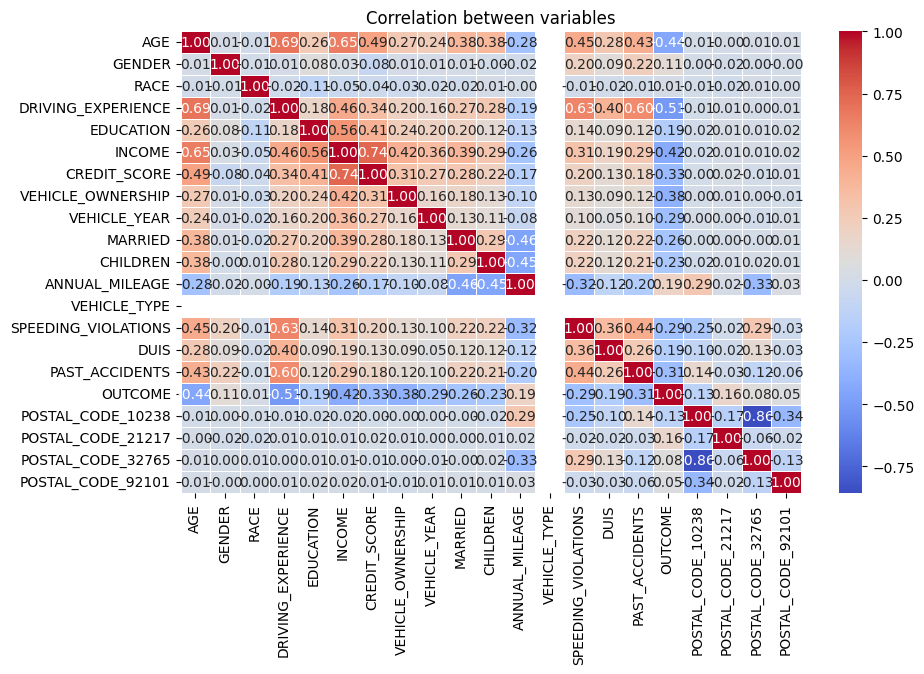

In [24]:
#correlation matrix:
correlation_matrix = data.corr()
print("Correlation matrix:", correlation_matrix)
plt.figure(figsize=(10,6)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between variables")
plt.show()     

In [105]:
from scipy.stats import pointbiserialr
#point-biserial correlation for handling a categorical variable (with 4 numeric levels) and a binary variable
data_cleaned = data.dropna(subset=["INCOME", "CREDIT_SCORE"])
coeff,p = pointbiserialr(data_cleaned["CREDIT_SCORE"], data_cleaned["INCOME"])
print(f"Coefficient of: {coeff:.2f}, p-value of {p:.2f}")


Coefficient of: 0.74, p-value of 0.00


In [26]:
data["OUTCOME"].astype('int64')

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: OUTCOME, Length: 10000, dtype: int64

In [107]:
coeff,p = pointbiserialr(data["OUTCOME"], data["INCOME"])
print(f"Coefficient of: {coeff:.2f}, p-value of {p:.2f}")

Coefficient of: -0.42, p-value of 0.00


In [ ]:
#linear correlation coefficients between columns and outcome variable
for column in data.columns:
    if column != "OUTCOME":
        correlation = data[column].corr(data["OUTCOME"])
        print(f"Correlation between {column} and OUTCOME is: {correlation:.2f}")

Correlation between AGE and OUTCOME is: -0.44
Correlation between GENDER and OUTCOME is: 0.11
Correlation between RACE and OUTCOME is: 0.01
Correlation between DRIVING_EXPERIENCE and OUTCOME is: -0.51
Correlation between EDUCATION and OUTCOME is: -0.19
Correlation between INCOME and OUTCOME is: -0.42
Correlation between CREDIT_SCORE and OUTCOME is: -0.33
Correlation between VEHICLE_OWNERSHIP and OUTCOME is: -0.38
Correlation between VEHICLE_YEAR and OUTCOME is: -0.29
Correlation between MARRIED and OUTCOME is: -0.26
Correlation between CHILDREN and OUTCOME is: -0.23
Correlation between ANNUAL_MILEAGE and OUTCOME is: 0.19
Correlation between VEHICLE_TYPE and OUTCOME is: nan
Correlation between SPEEDING_VIOLATIONS and OUTCOME is: -0.29
Correlation between DUIS and OUTCOME is: -0.19
Correlation between PAST_ACCIDENTS and OUTCOME is: -0.31
Correlation between POSTAL_CODE_10238 and OUTCOME is: -0.13
Correlation between POSTAL_CODE_21217 and OUTCOME is: 0.16
Correlation between POSTAL_CODE_3

/Users/tommasomilanino/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/tommasomilanino/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Now let's go on with some data visualization tools

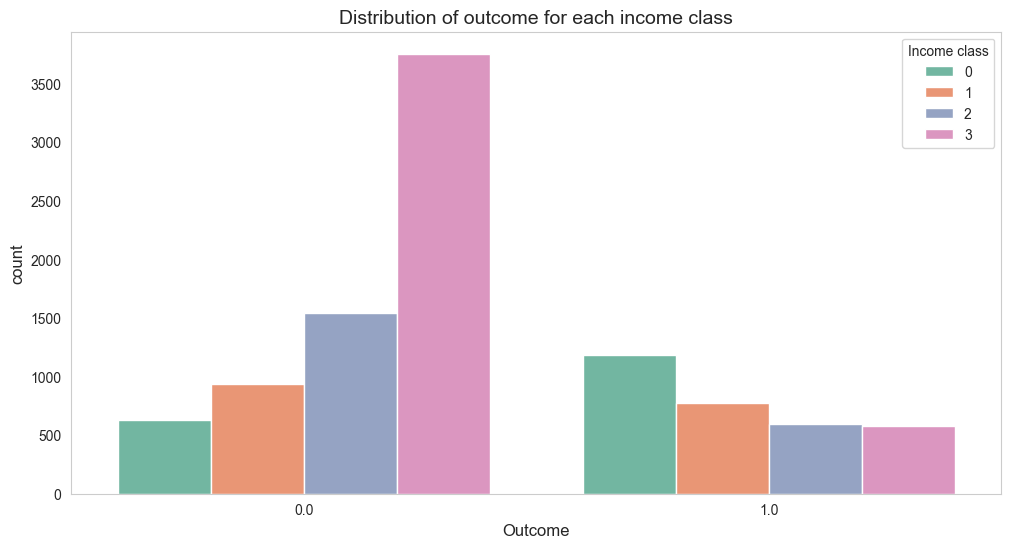

In [35]:
#scatterplot of income vs outcome:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(data, x="OUTCOME", hue="INCOME", palette="Set2")
plt.title("Distribution of outcome for each income class", fontsize=14)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("count", fontsize=12)
plt.legend(title="Income class")
plt.grid(axis="y")
plt.show()

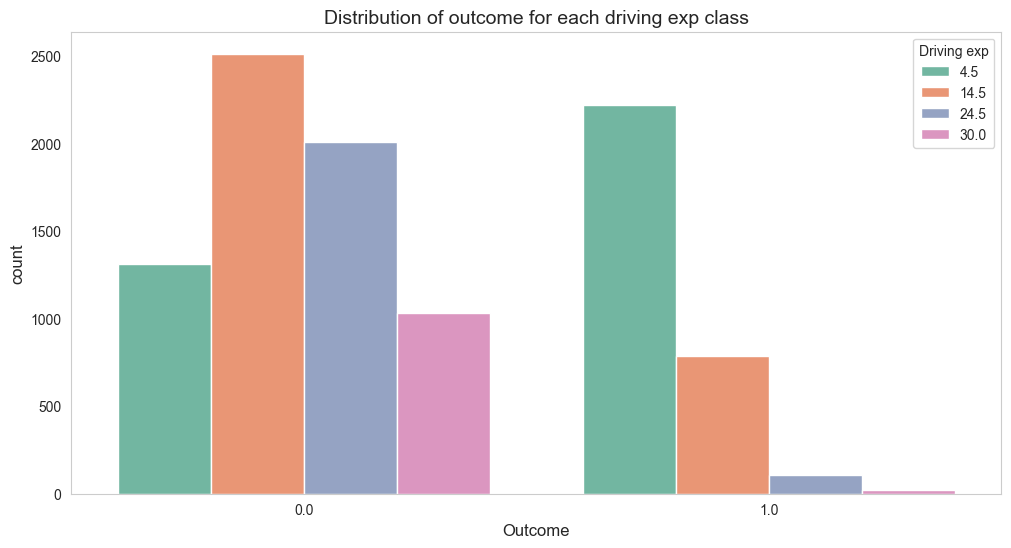

In [36]:
#plot for driving experience and outcome:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(data, x = "OUTCOME", hue="DRIVING_EXPERIENCE", palette="Set2")
plt.title("Distribution of outcome for each driving exp class", fontsize=14)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("count", fontsize=12)
plt.legend(title="Driving exp")
plt.grid(axis="y")
plt.show()

In [37]:
import plotly.express as px
fig = px.scatter(data, x="CREDIT_SCORE", y="OUTCOME", color="INCOME")
fig.show()


We see that people with a higher credit score (in our case, a high credit score means a costumer which is less likely to default, as witnessed before by the point-biserial correlation coefficient of the variables income and credit score) and a higher income tend to file less claims.

In [38]:
fig = px.histogram(data, x="OUTCOME", color="DRIVING_EXPERIENCE", barmode="group",
             pattern_shape="DRIVING_EXPERIENCE", pattern_shape_sequence=["x", ".", "+", "-"])
fig.show()

People with less driving experience are more likely to file claims.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  float64
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  float64
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  ANNUAL_MILEAGE       9043 non-null   float64
 12  VEHICLE_TYPE         10000 non-null  int64  
 13  SPEEDING_VIOLATIONS  10000 non-null  int64  
 14  DUIS                 10000 non-null  int64  
 15  PAST_ACCIDENTS       10000 non-null  

In [40]:
mean_annual_mileage = data["ANNUAL_MILEAGE"].dropna().mean()
mean_credit_score = data["CREDIT_SCORE"].dropna().mean()
print(mean_annual_mileage, mean_credit_score)

11697.003206900365 0.5158128096027911


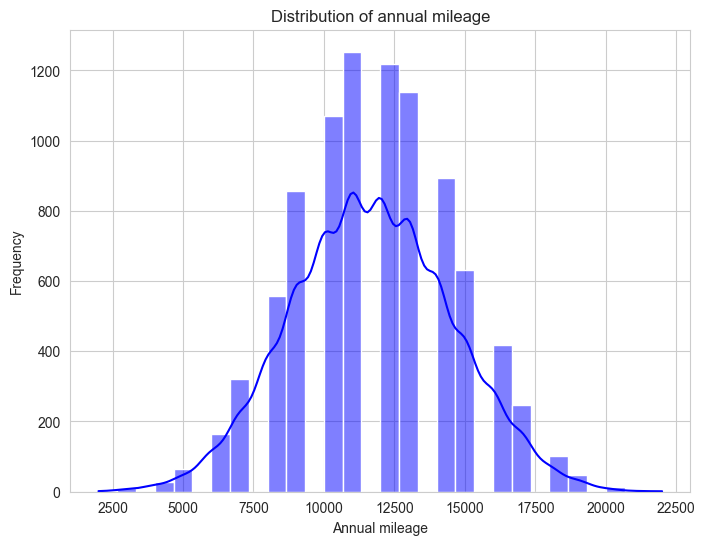

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data["ANNUAL_MILEAGE"], bins=30, kde=True, color="blue")
plt.title("Distribution of annual mileage")
plt.xlabel("Annual mileage")
plt.ylabel("Frequency")
plt.show()


The annual mileage distribution is almost a normal distribution, so we can compute the mean value for the NA values

In [42]:
from scipy.stats import skew,kurtosis
skew_mileage = skew(data["ANNUAL_MILEAGE"].dropna())
kurtosis_mileage = kurtosis(data["ANNUAL_MILEAGE"].dropna())
print(f"{skew_mileage:.3f}, {kurtosis_mileage:.3f}")

0.040, -0.130


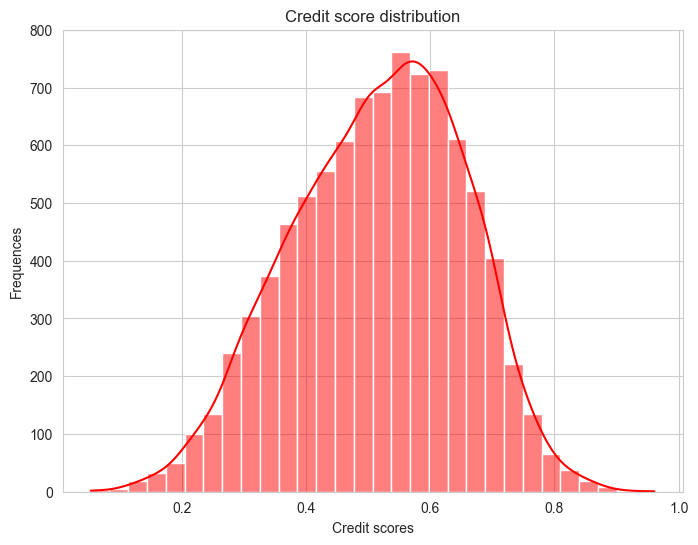

In [43]:
#Credit score distribution:
plt.figure(figsize=(8,6))
sns.histplot(data["CREDIT_SCORE"], bins=30, kde=True, color="red")
plt.title("Credit score distribution")
plt.xlabel("Credit scores")
plt.ylabel("Frequences")
plt.show()

In [44]:
#median value of the credit score distribution:
median_credit_score = np.median(data["CREDIT_SCORE"].dropna())
print(median_credit_score)

0.5250327586154788


In [45]:
from scipy.stats import skew, kurtosis

kurtosis = kurtosis(data["CREDIT_SCORE"].dropna())
skew = skew(data["CREDIT_SCORE"].dropna())
print(f"Skew value: {skew:.2f}, Kurtosis value:{kurtosis:.2f}")

Skew value: -0.23, Kurtosis value:-0.41


In [46]:
#D'Agostino and Pearson's test:
from scipy.stats import normaltest
normal, p = normaltest(data["CREDIT_SCORE"].dropna())
print(f"{normal:.2f} and {p:.2f}")


176.34 and 0.00


Data is likely normal so even for the credit score column we can compute the mean value!


In [ ]:
#approach for computing NA values in the column annual mileage, as it almost follows a normal distribution:
bins_size = 2000
counts, bin_edges = np.histogram(data["ANNUAL_MILEAGE"].dropna(), bins=range(int(data["ANNUAL_MILEAGE"].min()), 
                                                                             int(data["ANNUAL_MILEAGE"].max()) + bins_size,
                                                                             bins_size))
# Finding the bin with the highest frequency
max_bin_index = np.argmax(counts)
most_frequent_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])

print(f"Most Frequent Interval: {most_frequent_range}")

# Generating random values in this range for missing values
na_count = data["ANNUAL_MILEAGE"].isna().sum()
random_values = np.random.uniform(most_frequent_range[0], most_frequent_range[1], size=na_count)

# Filling missing values with generated random numbers
data.loc[data["ANNUAL_MILEAGE"].isna(), "ANNUAL_MILEAGE"] = random_values

Most Frequent Interval: (np.int64(12000), np.int64(14000))


In [48]:
data["ANNUAL_MILEAGE"].isna().sum()

np.int64(0)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  float64
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  float64
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  ANNUAL_MILEAGE       10000 non-null  float64
 12  VEHICLE_TYPE         10000 non-null  int64  
 13  SPEEDING_VIOLATIONS  10000 non-null  int64  
 14  DUIS                 10000 non-null  int64  
 15  PAST_ACCIDENTS       10000 non-null  

In [ ]:
#KNN Imputer for the Credit Score column as it follows a more skewed distribution:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

continuous_columns = ["CREDIT_SCORE", "ANNUAL_MILEAGE"]
scaler = StandardScaler()
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])
Knn_imputer = KNNImputer(n_neighbors=10, weights="distance")
data_imputed = Knn_imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
data_imputed[continuous_columns] = scaler.inverse_transform(data_imputed[continuous_columns])
print(data_imputed.isna().sum())

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
POSTAL_CODE_10238      0
POSTAL_CODE_21217      0
POSTAL_CODE_32765      0
POSTAL_CODE_92101      0
dtype: int64


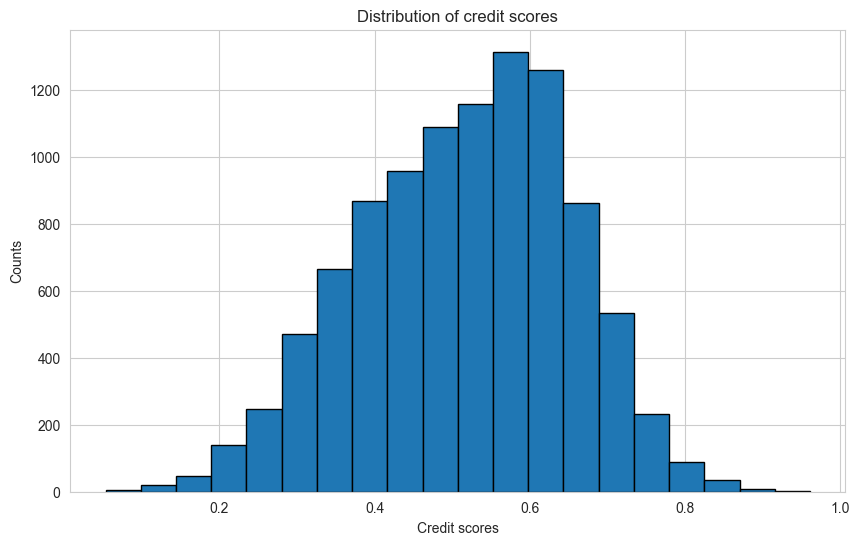

In [52]:
#distribution of the credit scores now that all the missing values have been computed
plt.figure(figsize=(10,6))
plt.hist(data_imputed["CREDIT_SCORE"], bins=20, edgecolor="black")
plt.title("Distribution of credit scores")
plt.xlabel("Credit scores")
plt.ylabel("Counts")
plt.show()

It basically follows the original distribution so a knn imputer represents, in our case, a valid approach for handling na-values.

<Axes: xlabel='CREDIT_SCORE', ylabel='INCOME'>

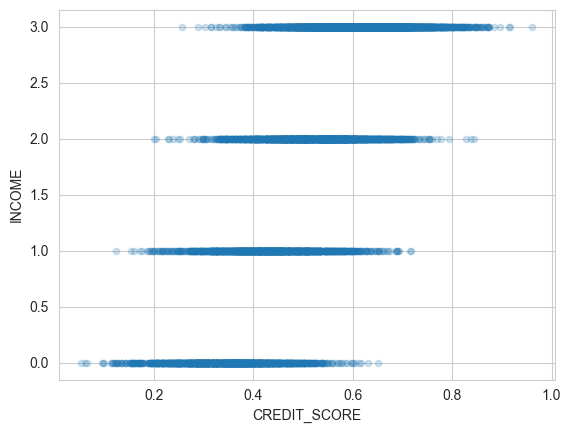

In [53]:
data_imputed.plot(kind="scatter", x="CREDIT_SCORE", y="INCOME", alpha = 0.2 )

In [57]:
#possible outliers for the column annual mileage:
import plotly.express as px
figure = px.violin(data_imputed, y="ANNUAL_MILEAGE", box=True, points="all")
figure.show()

Values of annual mileage are comprised between 2000 and 22000 miles, 
so no need for a specific outlier's treatment 

In [54]:
#point-biserial correlation for continuous variables
columns_to_be_analyzed = ["CREDIT_SCORE", "ANNUAL_MILEAGE"]
from scipy.stats import pointbiserialr
target_variable = "OUTCOME"
for column in columns_to_be_analyzed:
    corr,p = pointbiserialr(data_imputed[column].dropna(), data_imputed[target_variable])
    print(f"P-B correlation between {column} and OUTCOME is {corr:.2f} with a p-value of {p:.2f}")

P-B correlation between CREDIT_SCORE and OUTCOME is -0.34 with a p-value of 0.00
P-B correlation between ANNUAL_MILEAGE and OUTCOME is 0.18 with a p-value of 0.00


Key-takeaways: high credit-score -> slightly less likely to file a claim,
High annual-mileage: slightly more likely to file a claim    

In [55]:
#Chi-squared test and Cramer's V for assessing the relationship between categorical variables and outcome
columns_to_be_analyzed = ["AGE", "GENDER", "RACE", "INCOME", "EDUCATION",
                           "MARRIED", "CHILDREN", "VEHICLE_OWNERSHIP","VEHICLE_YEAR",
                           "VEHICLE_TYPE", "POSTAL_CODE_10238", "POSTAL_CODE_21217", 
                           "POSTAL_CODE_32765", "POSTAL_CODE_92101"]
target = "OUTCOME"
import scipy.stats as stats
for column in columns_to_be_analyzed:
    contingency_table = pd.crosstab(data_imputed[column], data[target])
    chi2,p,dof,expected = stats.chi2_contingency(contingency_table)
    print(f"For column {column}, Chi-squared value of:{chi2:.3f}, p-value of:{p:.2f}")

For column AGE, Chi-squared value of:2308.829, p-value of:0.00
For column GENDER, Chi-squared value of:114.473, p-value of:0.00
For column RACE, Chi-squared value of:0.627, p-value of:0.43
For column INCOME, Chi-squared value of:1797.956, p-value of:0.00
For column EDUCATION, Chi-squared value of:365.371, p-value of:0.00
For column MARRIED, Chi-squared value of:685.854, p-value of:0.00
For column CHILDREN, Chi-squared value of:541.039, p-value of:0.00
For column VEHICLE_OWNERSHIP, Chi-squared value of:1434.038, p-value of:0.00
For column VEHICLE_YEAR, Chi-squared value of:864.028, p-value of:0.00
For column VEHICLE_TYPE, Chi-squared value of:0.000, p-value of:1.00
For column POSTAL_CODE_10238, Chi-squared value of:181.292, p-value of:0.00
For column POSTAL_CODE_21217, Chi-squared value of:262.993, p-value of:0.00
For column POSTAL_CODE_32765, Chi-squared value of:61.864, p-value of:0.00
For column POSTAL_CODE_92101, Chi-squared value of:23.119, p-value of:0.00


In [56]:
#now let's calculate, for each column, the Cramer's V:
import math 

def cramers_v(chi2, n, r, c):
    return math.sqrt(chi2 / (n * min(r-1, c-1)))
for column in columns_to_be_analyzed:
    contingency_table = pd.crosstab(data_imputed[column], data[target])
    chi2,p,dof,expected = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r,c = contingency_table.shape
    cramer = cramers_v(chi2, n, r, c)
    print(f"Cramer's V-Value of the relationship between {column} and {target} is :{cramer:.2f}")

    
     

Cramer's V-Value of the relationship between AGE and OUTCOME is :0.48
Cramer's V-Value of the relationship between GENDER and OUTCOME is :0.11
Cramer's V-Value of the relationship between RACE and OUTCOME is :0.01
Cramer's V-Value of the relationship between INCOME and OUTCOME is :0.42
Cramer's V-Value of the relationship between EDUCATION and OUTCOME is :0.19
Cramer's V-Value of the relationship between MARRIED and OUTCOME is :0.26
Cramer's V-Value of the relationship between CHILDREN and OUTCOME is :0.23
Cramer's V-Value of the relationship between VEHICLE_OWNERSHIP and OUTCOME is :0.38
Cramer's V-Value of the relationship between VEHICLE_YEAR and OUTCOME is :0.29
Cramer's V-Value of the relationship between VEHICLE_TYPE and OUTCOME is :nan
Cramer's V-Value of the relationship between POSTAL_CODE_10238 and OUTCOME is :0.13
Cramer's V-Value of the relationship between POSTAL_CODE_21217 and OUTCOME is :0.16
Cramer's V-Value of the relationship between POSTAL_CODE_32765 and OUTCOME is :

/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_913/3700695805.py:5: RuntimeWarning:

invalid value encountered in divide



It looks like the strongest relationships lay between outcome and age, income and vehicle ownership .  
    

In [59]:
discrete_columns = ["PAST_ACCIDENTS", "DUIS", "SPEEDING_VIOLATIONS"]
from scipy.stats import spearmanr
target_var = "OUTCOME"
for column in discrete_columns:
    coeff,p = spearmanr(data_imputed[column], data_imputed[target_var])
    print(f"Spearman coefficient between {column} and {target_var} is: {coeff:.3f}, with a p-value of {p:.3f}")

Spearman coefficient between PAST_ACCIDENTS and OUTCOME is: -0.378, with a p-value of 0.000
Spearman coefficient between DUIS and OUTCOME is: -0.205, with a p-value of 0.000
Spearman coefficient between SPEEDING_VIOLATIONS and OUTCOME is: -0.377, with a p-value of 0.000


Now, before implementing any classifier, let's see whether our dataset is imbalanced or not:

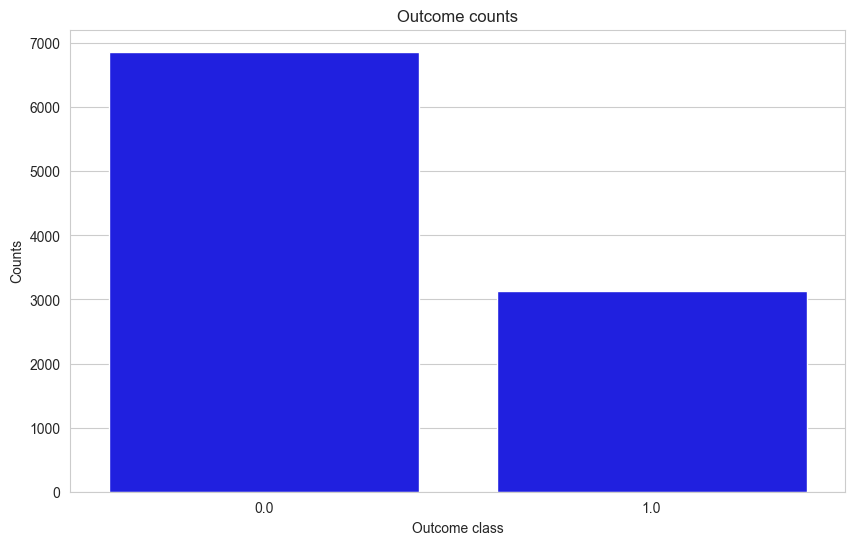

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(data_imputed, x="OUTCOME", color="blue")
plt.title("Outcome counts")
plt.xlabel("Outcome class")
plt.ylabel("Counts")
plt.show()

In [64]:
data_imputed["OUTCOME"].value_counts()

OUTCOME
0.0    6867
1.0    3133
Name: count, dtype: int64

As we can see, customer who didn't file a claim to the insurance almost account for 70% of the dataset! This means we have an imbalanced dataset... but we can apply different SMOTE technique to solve this problem!

In [96]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



X = data_imputed.drop(columns="OUTCOME", axis=1)
Y = data_imputed["OUTCOME"]

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy="auto", random_state=42)

X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print(f"Original column value count: {Y_train.value_counts()}")
print(f"Resampled column value count: {Y_train_resampled.value_counts()}")

Original column value count: OUTCOME
0.0    5500
1.0    2500
Name: count, dtype: int64
Resampled column value count: OUTCOME
0.0    5500
1.0    5500
Name: count, dtype: int64


Now that we have resampled the training test, let's proceed with creating two machine learning classifiers: Logistic Regression and Decision Tree. We'll be considering the accuracy as our main metric, but we'll be also displaying other metrics to assess the models performance.

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_standardize = ["ANNUAL_MILEAGE", "CREDIT_SCORE"]
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_resampled, Y_train_resampled)
accuracy = log_reg.score(X_test,Y_test)
y_pred = log_reg.predict(X_test)
print(f"Accuracy value for Logistic Regression:{accuracy}")

Accuracy value for Logistic Regression:0.8255


/Users/tommasomilanino/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [98]:
#let's get some other metrics to evaluate better our model performance:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, roc_auc_score, roc_curve

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.83
Precision: 0.69
Recall: 0.82
F1-Score: 0.75
ROC-AUC: 0.82


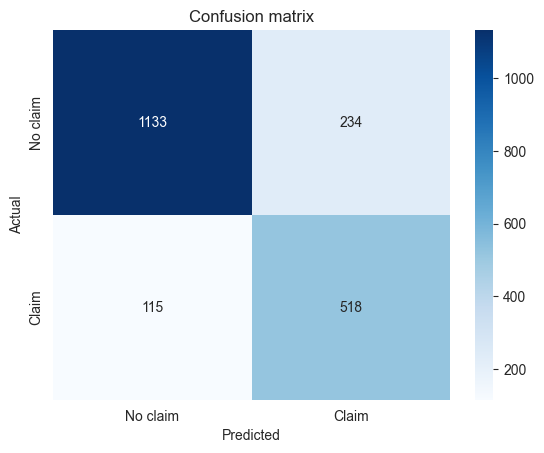

In [99]:
#Confusion matrix:
conf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No claim", "Claim"], yticklabels=["No claim", "Claim"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

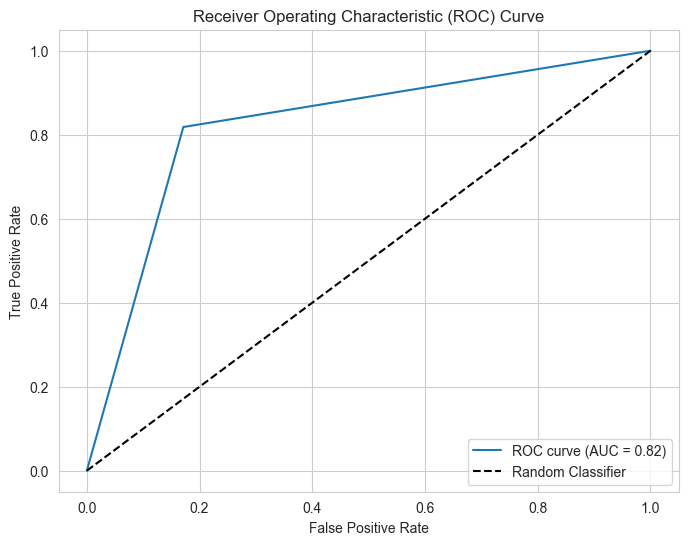

In [100]:
#ROC Curve:
fpr,tpr,tresholds = roc_curve(Y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Now let's proceed with a decision tree classifier:

In [101]:
from sklearn.tree import DecisionTreeClassifier

X = data_imputed.drop(columns="OUTCOME", axis=1)  # Features (excluding target)
y = data_imputed['OUTCOME']  # Target variable (the 'OUTCOME' column)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, y_train)


tree = DecisionTreeClassifier(random_state=42, max_depth=10)
tree.fit(X_train_resampled, Y_train_resampled)

Y_pred = tree.predict(X_test)

accuracy_tree = accuracy_score(Y_test, Y_pred)
precision_tree = precision_score(Y_test, Y_pred)
f1_tree = f1_score(Y_test, Y_pred)
recall_tree = recall_score(Y_test, Y_pred)
roc_auc_tree = roc_auc_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy_tree:.2f}")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall: {recall_tree:.2f}")
print(f"F1-Score: {f1_tree:.2f}")
print(f"ROC-AUC: {roc_auc_tree:.2f}")




Accuracy: 0.84
Precision: 0.74
Recall: 0.73
F1-Score: 0.74
ROC-AUC: 0.81


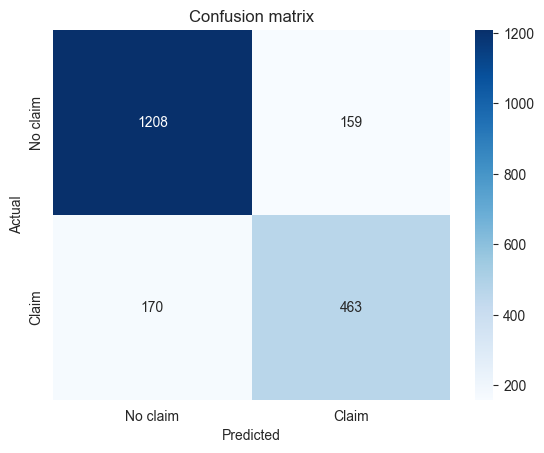

In [102]:
#Confusion matrix:
conf_matrix_tree = confusion_matrix(y_test, Y_pred)
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", xticklabels=["No claim", "Claim"], yticklabels=["No claim", "Claim"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

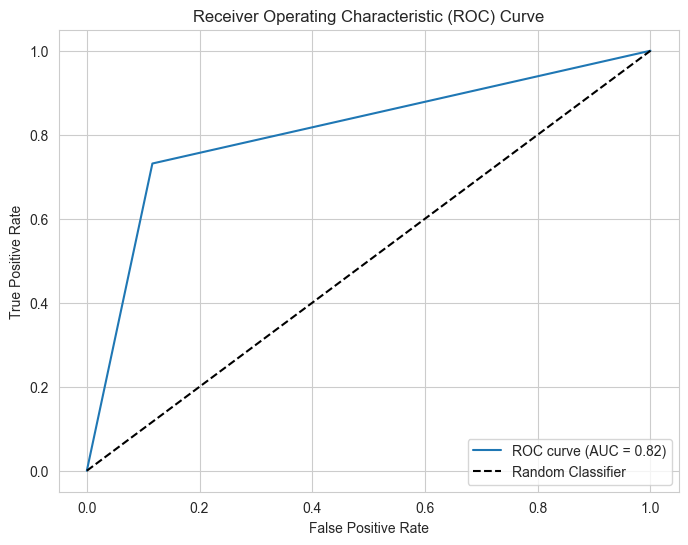

In [80]:
#ROC Curve:
fpr_tree,tpr_tree,tresholds_tree = roc_curve(y_test, Y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr_tree, tpr_tree, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Now it's time for Fine-tuning our models.
We select as the scoring parameter the accuracy as we have, thanks to SMOTE technique, a balanced dataset. Our method consists of crafting our own parameter grid: a dictionary containing lists of possible parameters values as values. Then we'll be leveraging the GridSearchCV module from Sci-Kit Learn library.

In [91]:
#Ridge-logistic regression model:

param_grid = {"penalty": ["l1", "l2", "elasticnet", "none"],
              "C": [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'] ,
              "l1_ratio": [0.1, 0.5, 0.9]
     }

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring="accuracy")
clf.fit(X_train_resampled,Y_train_resampled)

best_params = clf.best_params_
print(f"Best parameters:{best_params}")

best_model = clf.best_estimator_

accuracy_best = clf.score(X_test,Y_test)
print(f"Accuracy:{accuracy_best}")




/Users/tommasomilanino/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/tommasomilanino/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/tommasomilanino/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/tommasomilanino/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/tommasomilanino/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio paramet

Best parameters:{'C': 10, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy:0.8415


/Users/tommasomilanino/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tommasomilanino/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tommasomilanino/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tommasomilanino/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


810 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
---

We just get a 1% accuracy improvement and a considerable run-time... let's move on to the fine-tuning of the decision-tree classifier.

In [90]:
#fine-tuning for decision tree classifier:

param_grid_tree = {
    "max_depth": [3, 5, 10, None], 
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 4], 
    "max_features": [None, "sqrt", "log2"],
    "criterion": ["gini", "entropy"]
}

gridsearch = GridSearchCV(tree, param_grid=param_grid_tree, scoring="accuracy", n_jobs=-1)
gridsearch.fit(X_train_resampled, Y_train_resampled)

print(f"Best Parameters: {gridsearch.best_params_}")
print(f"Best Accuracy: {gridsearch.best_score_:.4f}")


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.8705


Here we get a better improvement in the accuracy score compared to the improvement obtained in the logistic regression model, as we start from an accuracy percentage of 84% and we reach 87% level.
The choice between the two models now depends on whether we prefer to consider the accuracy or the precision as the gold standard metric, or we prefer to consider more the recall metric or the F1 coefficient. In the first case, the choice would be the Logistic Regression model, in the second one we'll be opting for the Decision Tree Classifier.